In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
option_data = pd.read_csv("option_data.csv")
option_data

,option_price,spot,strike,vol,time_expiry
0,2.216567e+01,154.255501,131.452492,0.106517,0.296949
1,4.706498e-01,230.081123,272.456835,0.155399,0.440187
2,1.377754e-05,50.028594,237.926930,0.605573,0.312111
3,4.912670e-17,125.583143,240.658024,0.207951,0.140797
4,8.455911e-15,86.688973,167.369757,0.212769,0.162142
...,...,...,...,...,...
995,1.299422e+02,293.600867,161.877035,0.089260,0.421365
996,3.167023e+01,127.925729,96.031889,0.086294,0.122791
997,1.928718e-02,217.199151,257.183213,0.135345,0.230979
998,7.354934e+01,131.491802,57.749490,0.066736,0.100869


In [4]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the option_data.csv file
option_data = pd.read_csv('option_data.csv')

# Split the data into training and testing sets
X = option_data.drop('option_price', axis=1)
y = option_data['option_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM regression model with RBF kernel
svm_reg = SVR(kernel='rbf', C=100, gamma=0.5)
svm_reg.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3208.1982386800087


In [5]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Load data
option_data = pd.read_csv('option_data.csv')

# Split data into features (X) and target (y)
X = option_data.drop('option_price', axis=1)
y = option_data['option_price']

# Define the parameter grid to search over
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.1, 0.5, 1, 5]
}

# Create an SVM regressor object
svr = SVR(kernel='rbf')

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'C': 1000, 'gamma': 0.1}
Best score:  0.3918816358328622


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Load data
option_data = pd.read_csv('option_data.csv')

# Split data into features (X) and target (y)
X = option_data.drop('option_price', axis=1)
y = option_data['option_price']

# create random forest model
rf = RandomForestRegressor(random_state=8990)

# define grid search parameters
param_grid = {
    'n_estimators': [30, 50],
    'max_features': [3],
    'max_depth': [None]
}

# perform grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# print best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'max_features': 3, 'n_estimators': 50}
Best score:  0.9923928270927881


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

option_data = pd.read_csv('option_data.csv')

X = option_data.iloc[:, :-1].values
y = option_data.iloc[:, -1].values
X

array([[2.21656737e+01, 1.54255501e+02, 1.31452492e+02, 1.06517125e-01],
       [4.70649835e-01, 2.30081123e+02, 2.72456835e+02, 1.55399229e-01],
       [1.37775430e-05, 5.00285937e+01, 2.37926930e+02, 6.05573041e-01],
       ...,
       [1.92871810e-02, 2.17199151e+02, 2.57183213e+02, 1.35344651e-01],
       [7.35493355e+01, 1.31491802e+02, 5.77494900e+01, 6.67362671e-02],
       [7.04562404e-02, 2.43619317e+02, 2.86682067e+02, 1.38532475e-01]])

In [11]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

def get_cv_score(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return -np.mean(cv_scores)

# Model 1: Neural network with one hidden layer (ReLU activation)
def create_model(neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model1 = KerasRegressor(build_fn=create_model, neurons=128, epochs=100, batch_size=32, verbose=0)
cv_score1 = get_cv_score(model1, X, y)

# Model 2: Random forest regression
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
cv_score2 = get_cv_score(model2, X, y)

# Model 3: Support vector regression
from sklearn.svm import SVR

model3 = SVR(kernel='rbf', C=1, gamma='scale')
cv_score3 = get_cv_score(model3, X, y)

print('CV score for model 1:', cv_score1)
print('CV score for model 2:', cv_score2)
print('CV score for model 3:', cv_score3)

<ipython-input-11-39fc8e3febcc>:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 = KerasRegressor(build_fn=create_model, neurons=128, epochs=100, batch_size=32, verbose=0)


CV score for model 1: 0.02748545736334314
CV score for model 2: 0.0019601392449403745
CV score for model 3: 0.01868259925476999


In [12]:
import numpy as np

test_spot_price = np.arange(50, 301)
test_strike = np.ones(251) * 180
test_time_to_expiry = np.zeros(251)
test_volatility = np.zeros(251)

test_data = np.column_stack((test_spot_price, test_strike, test_time_to_expiry, test_volatility))

# Model 1
model1.fit(X, y)
test_pred1 = model1.predict(test_data)

# Model 2
model2.fit(X, y)
test_pred2 = model2.predict(test_data)

# Model 3
model3.fit(X, y)
test_pred3 = model3.predict(test_data)

test_true = np.maximum(test_spot_price - test_strike, 0)

print('Model 1 predictions:', test_pred1[:5])
print('Model 2 predictions:', test_pred2[:5])
print('Model 3 predictions:', test_pred3[:5])
print('True values:', test_true[:5])

Model 1 predictions: [0.73542684 0.74696773 0.75850385 0.77004284 0.7816362 ]
Model 2 predictions: [0.03899275 0.03899275 0.03899275 0.03899275 0.03899275]
Model 3 predictions: [0.16172109 0.1626825  0.16362696 0.1645544  0.16546475]
True values: [0. 0. 0. 0. 0.]


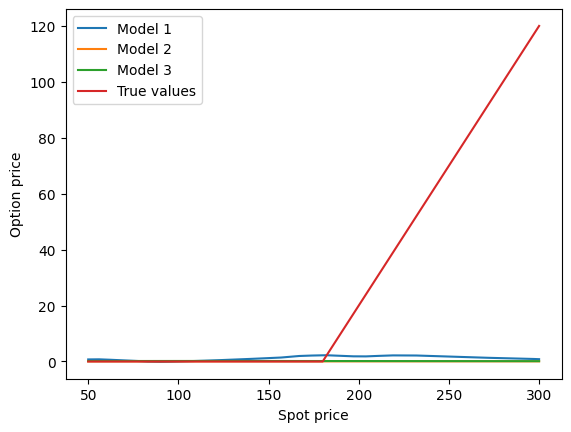

In [13]:
import matplotlib.pyplot as plt

plt.plot(test_spot_price, test_pred1, label='Model 1')
plt.plot(test_spot_price, test_pred2, label='Model 2')
plt.plot(test_spot_price, test_pred3, label='Model 3')
plt.plot(test_spot_price, test_true, label='True values')
plt.xlabel('Spot price')
plt.ylabel('Option price')
plt.legend()
plt.show()